# 심부전증 데이터 분석

# 데이터셋 준비

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
base_path = r'/content/drive/MyDrive/KoreaIT (코리아it)/250715 💚자연어처리S4/[자연어처리]/dataset(NLP2507)'

In [3]:
df = pd.read_csv(os.path.join(base_path, 'heart_failure_clinical_records_dataset.csv'))

df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


## 데이터 소개
1. 이번 주제는 Heart Failure Prediction 데이터셋을 사용합니다.
    
1. 다음 1개의 csv 파일을 사용합니다.
    heart_failure_clinical_records_dataset.csv
    
1. 각 파일의 컬럼은 아래와 같습니다.
    - age: 환자의 나이
    - anaemia: 환자의 빈혈증 여부 (0: 정상, 1: 빈혈)
    - creatinine_phosphokinase: 크레아틴키나제 검사 결과
    - diabetes: 당뇨병 여부 (0: 정상, 1: 당뇨)
    - ejection_fraction: 박출계수 (%)
    - high_blood_pressure: 고혈압 여부 (0: 정상, 1: 고혈압)
    - platelets: 혈소판 수 (kiloplatelets/mL)
    - serum_creatinine: 혈중 크레아틴 레벨 (mg/dL)
    - serum_sodium: 혈중 나트륨 레벨 (mEq/L)
    - sex: 성별 (0: 여성, 1: 남성)
    - smoking: 흡연 여부 (0: 비흡연, 1: 흡연)
    - time: 관찰 기간 (일)
    - DEATH_EVENT: 사망 여부 (0: 생존, 1: 사망)
    
    
    
1. 데이터 URL: https://www.kaggle.com/andrewmvd/heart-failure-clinical-data

## 데이터 관찰
약식으로 관찰

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


# 데이터 전처리

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
# '수치형' 데이터만 스케일링 하자.

In [8]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [ ]:
# '수치형 입력데이터', '분류형(범주형) 입력데이터', '출력(타켓) 데이터'로 구분하기

In [9]:
X_num = df[['age', 'creatinine_phosphokinase','ejection_fraction', 'platelets','serum_creatinine', 'serum_sodium']]
X_cat = df[['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']]
y = df['DEATH_EVENT']

In [10]:
X_num.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
0,75.0,582,20,265000.00,1.9,130
1,55.0,7861,38,263358.03,1.1,136
2,65.0,146,20,162000.00,1.3,129
3,50.0,111,20,210000.00,1.9,137
4,65.0,160,20,327000.00,2.7,116


In [11]:
X_cat.head()

,anaemia,diabetes,high_blood_pressure,sex,smoking
0,0,0,1,1,0
1,0,0,0,1,0
2,0,0,0,1,1
3,1,0,0,1,0
4,1,1,0,0,0


In [12]:
y.head()

,DEATH_EVENT
0,1
1,1
2,1
3,1
4,1


In [13]:
# 수치형 입력데이터를 전처리
scaler = StandardScaler()
scaler.fit(X_num)
X_scaled = scaler.transform(X_num)

X_scaled

array([[ 1.19294523e+00,  1.65728387e-04, -1.53055953e+00,
         1.68164843e-02,  4.90056987e-01, -1.50403612e+00],
       [-4.91279276e-01,  7.51463953e+00, -7.07675018e-03,
         7.53566018e-09, -2.84552352e-01, -1.41976151e-01],
       [ 3.50832977e-01, -4.49938761e-01, -1.53055953e+00,
        -1.03807313e+00, -9.09000174e-02, -1.73104612e+00],
       ...,
       [-1.33339153e+00,  1.52597865e+00,  1.85495776e+00,
         4.90208200e+00, -5.75030855e-01,  3.12043840e-01],
       [-1.33339153e+00,  1.89039811e+00, -7.07675018e-03,
        -1.26338936e+00,  5.92615005e-03,  7.66063830e-01],
       [-9.12335403e-01, -3.98321274e-01,  5.85388775e-01,
         1.34823057e+00,  1.99578485e-01, -1.41976151e-01]])

In [14]:
X_scaled = pd.DataFrame(data=X_scaled, index=X_num.index, columns=X_num.columns)
X_scaled.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
0,1.192945,0.000166,-1.530560,1.681648e-02,0.490057,-1.504036
1,-0.491279,7.514640,-0.007077,7.535660e-09,-0.284552,-0.141976
2,0.350833,-0.449939,-1.530560,-1.038073e+00,-0.090900,-1.731046
3,-0.912335,-0.486071,-1.530560,-5.464741e-01,0.490057,0.085034
4,0.350833,-0.435486,-1.530560,6.517986e-01,1.264666,-4.682176


In [15]:
X_scaled.describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
count,2.990000e+02,299.000000,2.990000e+02,2.990000e+02,2.990000e+02,2.990000e+02
mean,5.703353e-16,0.000000,-3.267546e-17,7.723291e-17,1.425838e-16,-8.673849e-16
std,1.001676e+00,1.001676,1.001676e+00,1.001676e+00,1.001676e+00,1.001676e+00
min,-1.754448e+00,-0.576918,-2.038387e+00,-2.440155e+00,-8.655094e-01,-5.363206e+00
25%,-8.281242e-01,-0.480393,-6.841802e-01,-5.208700e-01,-4.782047e-01,-5.959961e-01
50%,-7.022315e-02,-0.342574,-7.076750e-03,-1.390846e-02,-2.845524e-01,8.503384e-02
75%,7.718891e-01,0.000166,5.853888e-01,4.111199e-01,5.926150e-03,7.660638e-01
max,2.877170e+00,7.514640,3.547716e+00,6.008180e+00,7.752020e+00,2.582144e+00


In [16]:
# scaled 된 수치형 과 범주형 을 다시 합치기
X = pd.concat([X_scaled, X_cat], axis=1)
X.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,anaemia,diabetes,high_blood_pressure,sex,smoking
0,1.192945,0.000166,-1.530560,1.681648e-02,0.490057,-1.504036,0,0,1,1,0
1,-0.491279,7.514640,-0.007077,7.535660e-09,-0.284552,-0.141976,0,0,0,1,0
2,0.350833,-0.449939,-1.530560,-1.038073e+00,-0.090900,-1.731046,0,0,0,1,1
3,-0.912335,-0.486071,-1.530560,-5.464741e-01,0.490057,0.085034,1,0,0,1,0
4,0.350833,-0.435486,-1.530560,6.517986e-01,1.264666,-4.682176,1,1,0,0,0


# 훈련데이터, 테스트 데이터 분리

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
# train:test = 7:3

X_train, X_test, y_train, y_test = \
  train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
X_train.shape, X_test.shape

((209, 11), (90, 11))

# 분류 모델 학습

In [20]:
from sklearn.linear_model import LogisticRegression

In [25]:
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

# 학습 결과 평가

In [22]:
# 분류형 모델의 경우
# precision, recall, f1-score 등을 가장 손쉽게 보는 방법
# classification_report 사용

In [23]:
from sklearn.metrics import classification_report

In [26]:
pred = model_lr.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.67      0.91      0.77        53
           1       0.72      0.35      0.47        37

    accuracy                           0.68        90
   macro avg       0.69      0.63      0.62        90
weighted avg       0.69      0.68      0.65        90



# XGBoost 모델로 학습

In [27]:
from xgboost import XGBClassifier

In [29]:
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

## 모델 학습 평가

In [30]:
pred = model_xgb.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.68      0.81      0.74        53
           1       0.63      0.46      0.53        37

    accuracy                           0.67        90
   macro avg       0.66      0.64      0.64        90
weighted avg       0.66      0.67      0.65        90



# 특성중요도 확인

In [31]:
model_xgb.feature_importances_

array([0.1133091 , 0.07535394, 0.1297046 , 0.05928128, 0.21652417,
       0.06204965, 0.03370712, 0.06648673, 0.06410144, 0.12330789,
       0.0561741 ], dtype=float32)

In [32]:
model_xgb.feature_importances_.sum()

np.float32(1.0)

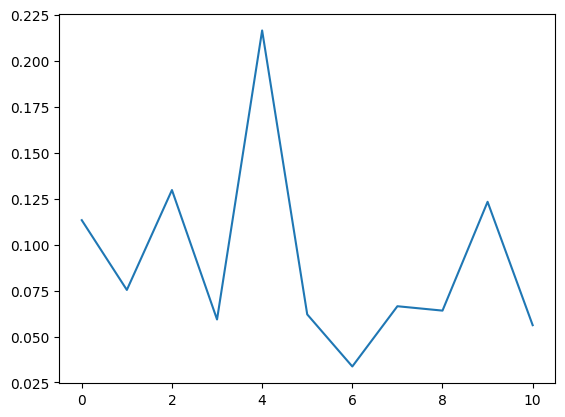

In [33]:
plt.plot(model_xgb.feature_importances_)

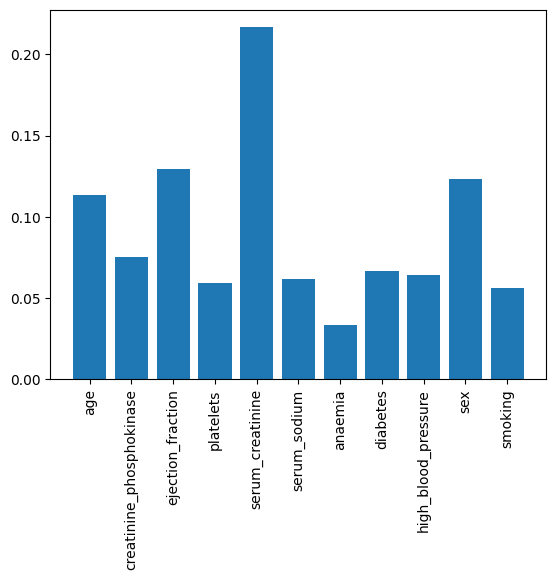

In [34]:
plt.bar(X.columns, model_xgb.feature_importances_)
plt.xticks(rotation=90)
plt.show()

In [35]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

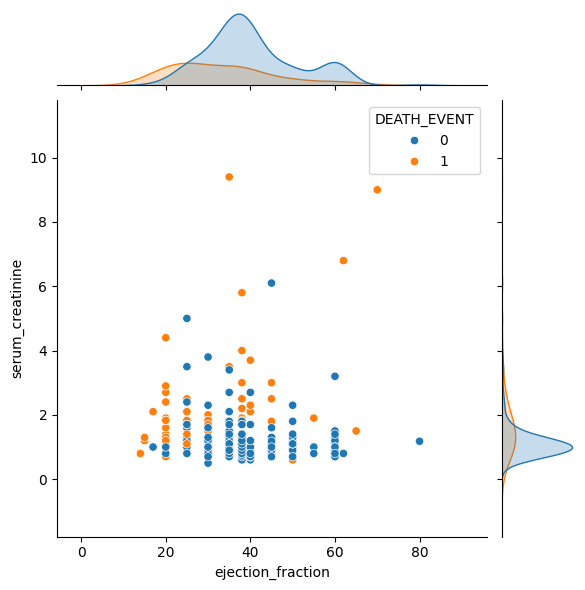

In [36]:
sns.jointplot(data=df, x='ejection_fraction', y='serum_creatinine', hue='DEATH_EVENT')

## Precision-Recall 커브 확인

In [37]:
from sklearn.metrics import PrecisionRecallDisplay, precision_recall_curve

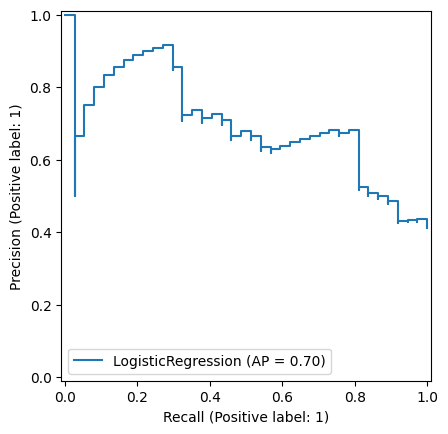

In [38]:
PrecisionRecallDisplay.from_estimator(model_lr, X_test, y_test)

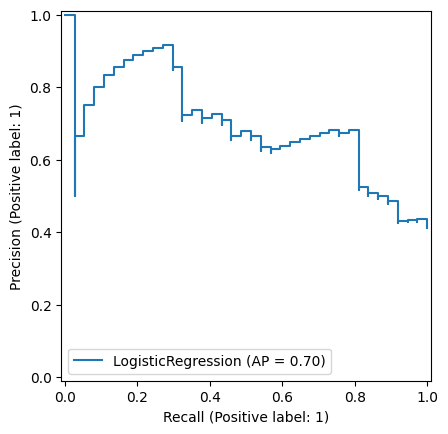

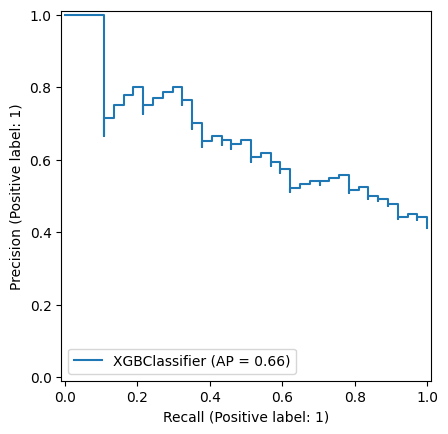

In [39]:
PrecisionRecallDisplay.from_estimator(model_lr, X_test, y_test)
PrecisionRecallDisplay.from_estimator(model_xgb, X_test, y_test)

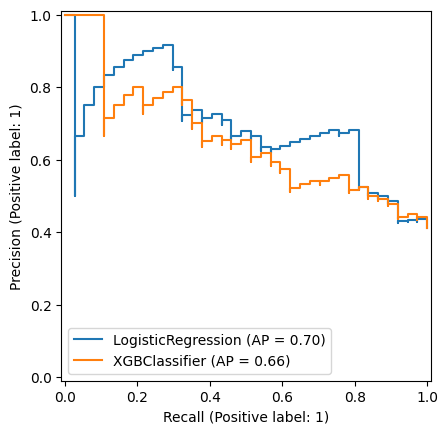

In [40]:
fig = plt.figure()
ax = fig.gca()   # 현재 axesplot 객체 리턴   (get current axesplot)

PrecisionRecallDisplay.from_estimator(model_lr, X_test, y_test, ax=ax)
PrecisionRecallDisplay.from_estimator(model_xgb, X_test, y_test, ax=ax)

## ROC 커브

In [41]:
from sklearn.metrics import RocCurveDisplay, roc_curve

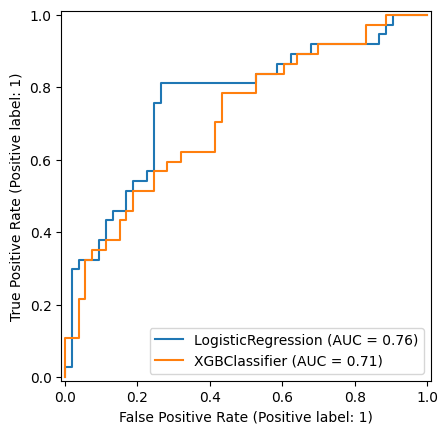

In [42]:
fig = plt.figure()
ax = fig.gca()

RocCurveDisplay.from_estimator(model_lr, X_test, y_test, ax=ax)
RocCurveDisplay.from_estimator(model_xgb, X_test, y_test, ax=ax)